### Titanic Solution

In [107]:
import pandas as pd
import seaborn as sns
import numpy as np
import numpy.random as rnd

In [108]:
titanic_train = pd.read_csv("../train.csv",sep=',')
test = pd.read_csv("../test.csv", sep=',')
train = titanic_train[["Parch", "Sex", "Age", "SibSp", "Fare", "Embarked","Pclass" ,"Survived"]]
train_test = [train, test]
print('Train data')
print(train.head())
print('\n\nTest data')
test.head()



Train data
   Parch     Sex   Age  SibSp     Fare Embarked  Pclass  Survived
0      0    male  22.0      1   7.2500        S       3         0
1      0  female  38.0      1  71.2833        C       1         1
2      0  female  26.0      0   7.9250        S       3         1
3      0  female  35.0      1  53.1000        S       1         1
4      0    male  35.0      0   8.0500        S       3         0


Test data


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [109]:
print(train.info())
print('\n\nTest info')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Parch       891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Pclass      891 non-null int64
Survived    891 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None


Test info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


####  To find null values in the dataset

In [110]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Visualisations

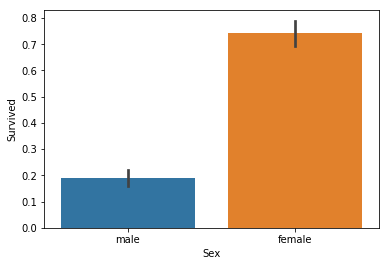

In [48]:
sns.barplot(x='Sex', y='Survived', data=train)

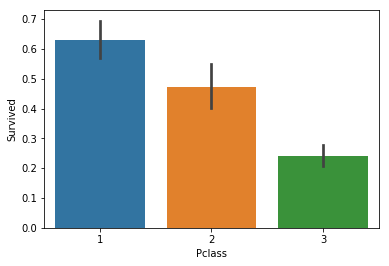

In [49]:
sns.barplot(x='Pclass', y='Survived', data=train)

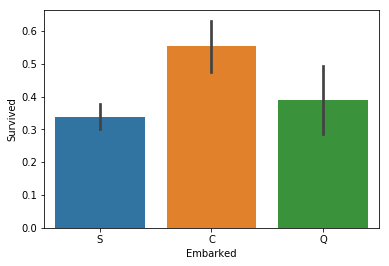

In [50]:
sns.barplot(x='Embarked', y='Survived', data=train)

In [111]:
train_test = [train, test]
train_test


[     Parch     Sex   Age  SibSp      Fare Embarked  Pclass  Survived
 0        0    male  22.0      1    7.2500        S       3         0
 1        0  female  38.0      1   71.2833        C       1         1
 2        0  female  26.0      0    7.9250        S       3         1
 3        0  female  35.0      1   53.1000        S       1         1
 4        0    male  35.0      0    8.0500        S       3         0
 5        0    male   NaN      0    8.4583        Q       3         0
 6        0    male  54.0      0   51.8625        S       1         0
 7        1    male   2.0      3   21.0750        S       3         0
 8        2  female  27.0      0   11.1333        S       3         1
 9        0  female  14.0      1   30.0708        C       2         1
 10       1  female   4.0      1   16.7000        S       3         1
 11       0  female  58.0      0   26.5500        S       1         1
 12       0    male  20.0      0    8.0500        S       3         0
 13       5    male 

In [112]:
train['Age'].isnull().sum()

177

In [113]:
mean = train['Age'].mean()
std = train['Age'].std()
null_count = train['Age'].isnull().sum()
train['Age'][np.isnan(train['Age'])] = rnd.randint(mean-std, mean+std, size= null_count)

C:\Users\rrjain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rrjain\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\rrjain\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

In [114]:
test['Sex'].isnull().sum()

0

In [115]:
for dataset in train_test:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

C:\Users\rrjain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [54]:
...for index,row in train_test.iterrows():
    if(row['Sex']=='female'):
      train_test.at[index,'Sex']=1
    else:
       train_test.at[index,'Sex']=0
train_test.head()        

SyntaxError: invalid syntax (<ipython-input-54-d40a734b5dcb>, line 1)

In [116]:
train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [117]:
for data in train_test:
   data['Embarked']= data['Embarked'].fillna('S')

C:\Users\rrjain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [118]:
for dataset in train_test:
    #print(dataset.Embarked.unique())
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

C:\Users\rrjain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [119]:
for dataset in train_test:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

C:\Users\rrjain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [120]:
train_test

[     Parch  Sex   Age  SibSp      Fare  Embarked  Pclass  Survived
 0        0    0  22.0      1    7.2500         0       3         0
 1        0    1  38.0      1   71.2833         1       1         1
 2        0    1  26.0      0    7.9250         0       3         1
 3        0    1  35.0      1   53.1000         0       1         1
 4        0    0  35.0      0    8.0500         0       3         0
 5        0    0  17.0      0    8.4583         2       3         0
 6        0    0  54.0      0   51.8625         0       1         0
 7        1    0   2.0      3   21.0750         0       3         0
 8        2    1  27.0      0   11.1333         0       3         1
 9        0    1  14.0      1   30.0708         1       2         1
 10       1    1   4.0      1   16.7000         0       3         1
 11       0    1  58.0      0   26.5500         0       1         1
 12       0    0  20.0      0    8.0500         0       3         0
 13       5    0  39.0      1   31.2750         

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [122]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 7), (891,), (418, 10))

In [123]:
test = test[["Parch", "Sex", "Age", "SibSp", "Fare", "Embarked","Pclass"]]
test.head()

,Parch,Sex,Age,SibSp,Fare,Embarked,Pclass
0,0,0,34.5,0,7.8292,2,3
1,0,1,47.0,1,7.0000,0,3
2,0,0,62.0,0,9.6875,2,2
3,0,0,27.0,0,8.6625,0,3
4,1,1,22.0,1,12.2875,0,3


In [89]:
X_train.head()

,Parch,Sex,Age,SibSp,Fare,Embarked,Pclass
0,0,male,22.0,1,7.2500,0,3
1,0,female,38.0,1,71.2833,1,1
2,0,female,26.0,0,7.9250,0,3
3,0,female,35.0,1,53.1000,0,1
4,0,male,35.0,0,8.0500,0,3


In [125]:
X_test = test[["Parch", "Sex", "Age", "SibSp", "Fare", "Embarked","Pclass"]]
X_test['Age'].fillna(age_mean, inplace=True)
X_test.isnull().sum()

Parch       0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    0
Pclass      0
dtype: int64

In [126]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
acc_log_reg

80.02